In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

In [2]:
%matplotlib inline

# Vykreslení histogramu
- data v textovém souboru - 1 100 000 hodnot
- vykreslit histogram (např. 50 sloupců)
- vykreslit normální normované rozdelení

In [3]:
x = np.loadtxt('data.txt')
x.shape

(1100000,)

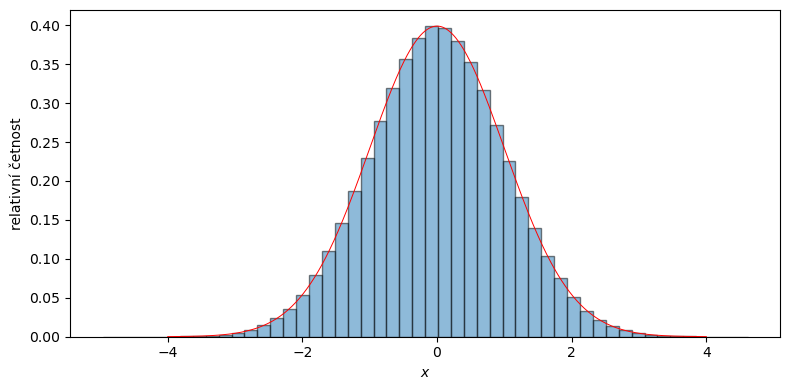

In [4]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100, tight_layout=True)
ax.hist(x, bins=50, density=True, ec='k', alpha=.5)

x_rv = np.linspace(-4, 4, 1000)
rv = stats.norm(0, 1)
ax.plot(x_rv, rv.pdf(x_rv), 'r-', lw=.7)

ax.set_xlabel('$x$')
ax.set_ylabel('relativní četnost');

## Porovnání rychlosti načítání
- pandas read_csv vs numpy loadtxt

In [5]:
%timeit np.loadtxt('data.txt')

2.82 s ± 57.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit pd.read_csv('data.txt', header=None)

278 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- pokud potřebuji data znovu načítat, může být vhodné si je při prvním čtení přeuložit do jiného formátu
    - np.save - npy soubor
    - pd.to_pickle - pickle soubor
- opětovné načtení je značně rychlejší
- uložená data mají pro tuto úlohu cca 1/3 původní velikosti

In [7]:
np.save('data.npy', x)
pd.to_pickle(x, 'data.pkl')
for f in ['data.txt', 'data.npy', 'data.pkl']:
    print(f, pathlib.Path(f).stat().st_size / 1024**2, 'MB')

data.txt 26.750383377075195 MB
data.npy 8.3924560546875 MB
data.pkl 8.392465591430664 MB


In [8]:
%timeit np.load('data.npy')

2.74 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit pd.read_pickle('data.pkl')

2.44 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- načtení pomocí základních operací v Pythonu - cyklus for, list, split, float

In [10]:
%%time
with open('data.txt', 'r') as f:
    data = [float(i) for i in f.read().split()]
    #data = f.read().split()
    #data = np.array(data, dtype=float)
print(data[:5])

[0.4270977122435485, -0.6468872296068299, -0.6700372343795019, -0.06901732829237577, 0.7539002656460824]
CPU times: user 535 ms, sys: 136 ms, total: 671 ms
Wall time: 668 ms
